In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker

import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Reading in NW2 data:

In [2]:
#1/4 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00031502.nc', decode_times=False)  #100 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.25deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [3]:
#0.25 degree: 
#ACC        : lon:20:220,   lat: 20:140
#Outside ACC: lon:20:220,   lat: 160:540
lon1 = 20; lon2=220;
lat1 =160; lat2=540;

KEterm1 = (av['dKE_dt'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1) #summing vertically
#assuming all of these are on the RHS of the KE equation
KEterm2 = (av['KE_CorAdv'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm3 = (av['PE_to_KE'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm4 = (av['KE_BT'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm5 = (av['KE_visc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm6 = (av['KE_horvisc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)

KEterm1 = (KEterm1).mean(axis=0).mean(axis=1); #time and zonally averaging
KEterm2 = (KEterm2).mean(axis=0).mean(axis=1);
KEterm3 = (KEterm3).mean(axis=0).mean(axis=1);
KEterm4 = (KEterm4).mean(axis=0).mean(axis=1);
KEterm5 = (KEterm5).mean(axis=0).mean(axis=1);
KEterm6 = (KEterm6).mean(axis=0).mean(axis=1);

E = KEterm1-KEterm2-KEterm3-KEterm4-KEterm5-KEterm6 #residual term between dKE/dt and RHS of equation
yh_plot = av.yh[lat1:lat2]

Text(0.5, 1.0, 'Outside ACC, 1/4$^\\circ$')

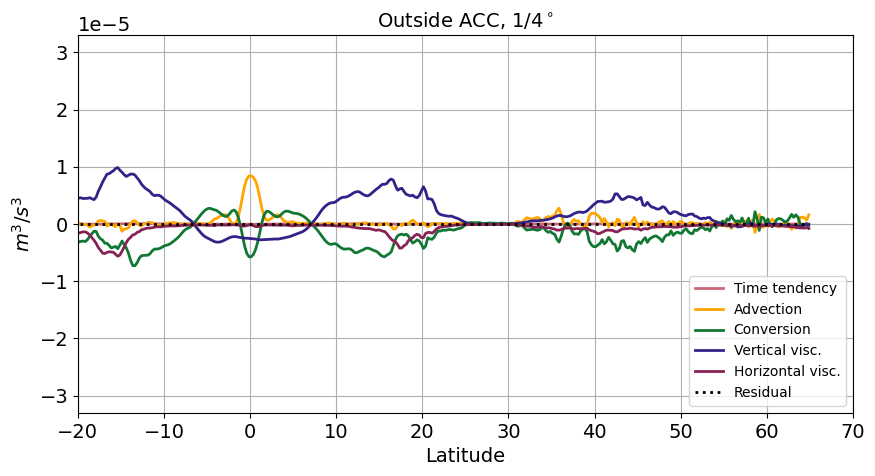

In [7]:
plt.rc('font', size=14)

plt.figure(figsize=(10, 5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh_plot,KEterm1,'-',c='#CC6677',linewidth=2)
plt.plot(yh_plot,KEterm2,'-',c='#FFA500',linewidth=2)
plt.plot(yh_plot,(KEterm3+KEterm4),'-',c='#117733',linewidth=2)
plt.plot(yh_plot,(KEterm5),'-',c='#332288',linewidth=2)
plt.plot(yh_plot,(KEterm6),'-',c='#882255',linewidth=2)
plt.plot(yh_plot,E,':',c='k',linewidth=2)


plt.grid()

plt.legend(['Time tendency','Advection','Conversion','Vertical visc.','Horizontal visc.','Residual'],loc='lower right',fontsize=10)
#plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
plt.xlim(-20,70);# plt.xticks(fontsize=14); 
plt.ylim(-3.3e-5,3.3e-5); 
plt.yticks(fontsize=14)

#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('$m^3/s^3$',fontsize=14)
plt.title('Outside ACC, 1/4$^\circ$',fontsize=14)

In [8]:
#0.25 degree: 
#ACC        : lon:20:220,   lat: 20:140
#Outside ACC: lon:20:220,   lat: 160:540
lon1 = 20; lon2=220;
lat1 = 20; lat2=140;

KEterm1 = (av['dKE_dt'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1) #summing vertically
#assuming all of these are on the RHS of the KE equation
KEterm2 = (av['KE_CorAdv'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm3 = (av['PE_to_KE'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm4 = (av['KE_BT'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm5 = (av['KE_visc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm6 = (av['KE_horvisc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)

KEterm1 = (KEterm1).mean(axis=0).mean(axis=1); #time and zonally averaging
KEterm2 = (KEterm2).mean(axis=0).mean(axis=1);
KEterm3 = (KEterm3).mean(axis=0).mean(axis=1);
KEterm4 = (KEterm4).mean(axis=0).mean(axis=1);
KEterm5 = (KEterm5).mean(axis=0).mean(axis=1);
KEterm6 = (KEterm6).mean(axis=0).mean(axis=1);

E = KEterm1-KEterm2-KEterm3-KEterm4-KEterm5-KEterm6 #residual term between dKE/dt and RHS of equation
yh_plot = av.yh[lat1:lat2]

Text(0.5, 1.0, 'ACC, 1/4$^\\circ$')

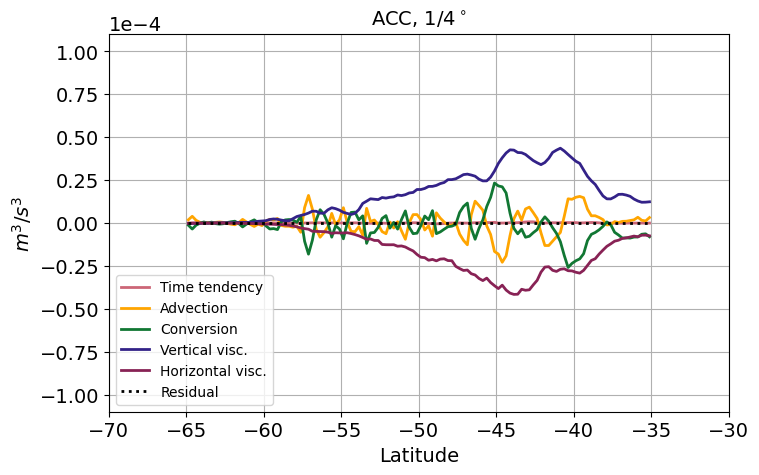

In [9]:
plt.rc('font', size=14)

plt.figure(figsize=(8, 5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh_plot,KEterm1,'-',c='#CC6677',linewidth=2)
plt.plot(yh_plot,KEterm2,'-',c='#FFA500',linewidth=2)
plt.plot(yh_plot,(KEterm3+KEterm4),'-',c='#117733',linewidth=2)
plt.plot(yh_plot,(KEterm5),'-',c='#332288',linewidth=2)
plt.plot(yh_plot,(KEterm6),'-',c='#882255',linewidth=2)
plt.plot(yh_plot,E,':',c='k',linewidth=2)


plt.grid()

plt.legend(['Time tendency','Advection','Conversion','Vertical visc.','Horizontal visc.','Residual'],loc='lower left',fontsize=10)
plt.xlim(-70,-30);
plt.ylim(-1.1e-4,1.1e-4); 
plt.yticks(fontsize=14)

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('$m^3/s^3$',fontsize=14)
plt.title('ACC, 1/4$^\circ$',fontsize=14)

In [10]:
#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00002702.nc', decode_times=False)  #20 5-day averages
#av = xr.open_mfdataset(['averages_00002302.nc','averages_00002402.nc','averages_00002502.nc','averages_00002602.nc','averages_00002702.nc'], decode_times=False)  #20 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [11]:
#0.03125 degree: 
#ACC        : lon:160:1760,   lat: 160:1120
#Outside ACC: lon:160:1760,   lat: 1280:4320
lon1 = 160; lon2=1760;
lat1 = 1280; lat2=4320;

KEterm1 = (av['dKE_dt'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1) #summing vertically
#assuming all of these are on the RHS of the KE equation
KEterm2 = (av['KE_CorAdv'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm3 = (av['PE_to_KE'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm4 = (av['KE_BT'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm5 = (av['KE_visc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm6 = (av['KE_horvisc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)

KEterm1 = (KEterm1).mean(axis=0); #time averaging
KEterm2 = (KEterm2).mean(axis=0);
KEterm3 = (KEterm3).mean(axis=0);
KEterm4 = (KEterm4).mean(axis=0);
KEterm5 = (KEterm5).mean(axis=0);
KEterm6 = (KEterm6).mean(axis=0);

E = KEterm1-KEterm2-KEterm3-KEterm4-KEterm5-KEterm6 #residual term between dKE/dt and RHS of equation


skip = 10
KEterm1 = KEterm1[::skip,::skip].mean(axis=1)
KEterm2 = KEterm2[::skip,::skip].mean(axis=1)
KEterm3 = KEterm3[::skip,::skip].mean(axis=1)
KEterm4 = KEterm4[::skip,::skip].mean(axis=1)
KEterm5 = KEterm5[::skip,::skip].mean(axis=1)
KEterm6 = KEterm6[::skip,::skip].mean(axis=1)
E = E[::skip,::skip]
yh_plot = av.yh[lat1:lat2]; yh_plot=yh_plot[::skip]
print('done')

done


Text(0.5, 1.0, 'Outside ACC, 1/32$^\\circ$')

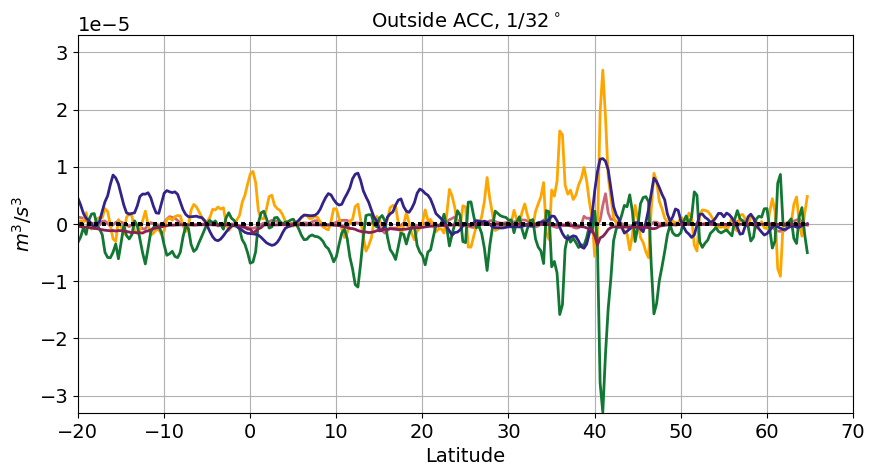

In [13]:
plt.rc('font', size=14)

plt.figure(figsize=(10, 5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh_plot,KEterm1,'-',c='#CC6677',linewidth=2)
plt.plot(yh_plot,KEterm2,'-',c='#FFA500',linewidth=2)
plt.plot(yh_plot,(KEterm3+KEterm4),'-',c='#117733',linewidth=2)
plt.plot(yh_plot,(KEterm5),'-',c='#332288',linewidth=2)
plt.plot(yh_plot,(KEterm6),'-',c='#882255',linewidth=2)
plt.plot(yh_plot,E,':',c='k',linewidth=2)


plt.grid()

#plt.legend(['Time tendency','Advection','Conversion','Vertical visc.','Horizontal visc.','Residual'],loc='lower right',fontsize=10)
plt.xlim(-20,70);
plt.ylim(-3.3e-5,3.3e-5); 
plt.yticks(fontsize=14)

#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('$m^3/s^3$',fontsize=14)
plt.title('Outside ACC, 1/32$^\circ$',fontsize=14)



In [10]:
#0.03125 degree: 
#ACC        : lon:160:1760,   lat: 160:1120
#Outside ACC: lon:160:1760,   lat: 1280:4320
lon1 = 160; lon2=1760;
lat1 = 160; lat2=1120;

KEterm1 = (av['dKE_dt'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1) #summing vertically
#assuming all of these are on the RHS of the KE equation
KEterm2 = (av['KE_CorAdv'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm3 = (av['PE_to_KE'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm4 = (av['KE_BT'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm5 = (av['KE_visc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)
KEterm6 = (av['KE_horvisc'][:,:,lat1:lat2,lon1:lon2]).sum(axis=1)

KEterm1 = (KEterm1).mean(axis=0); #time averaging
KEterm2 = (KEterm2).mean(axis=0);
KEterm3 = (KEterm3).mean(axis=0);
KEterm4 = (KEterm4).mean(axis=0);
KEterm5 = (KEterm5).mean(axis=0);
KEterm6 = (KEterm6).mean(axis=0);

E = KEterm1-KEterm2-KEterm3-KEterm4-KEterm5-KEterm6 #residual term between dKE/dt and RHS of equation


skip = 10
KEterm1 = KEterm1[::skip,::skip].mean(axis=1)
KEterm2 = KEterm2[::skip,::skip].mean(axis=1)
KEterm3 = KEterm3[::skip,::skip].mean(axis=1)
KEterm4 = KEterm4[::skip,::skip].mean(axis=1)
KEterm5 = KEterm5[::skip,::skip].mean(axis=1)
KEterm6 = KEterm6[::skip,::skip].mean(axis=1)
E = E[::skip,::skip]
yh_plot = av.yh[lat1:lat2]; yh_plot=yh_plot[::skip]
print('done')

done


Text(0.5, 1.0, 'ACC, 1/32$^\\circ$')

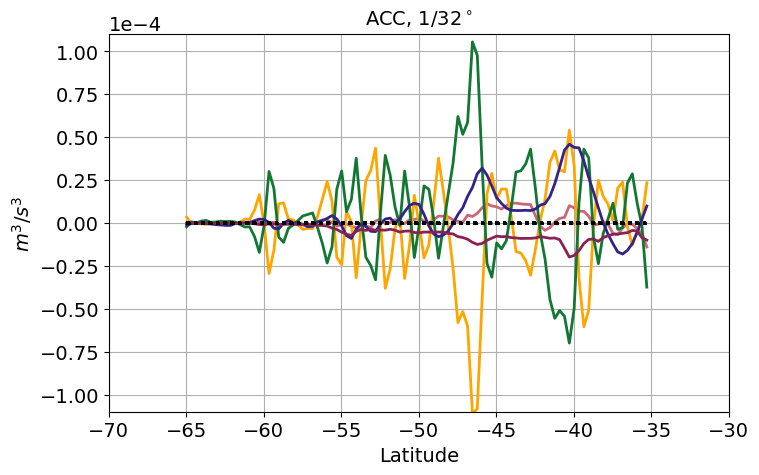

In [11]:
plt.rc('font', size=14)

plt.figure(figsize=(8, 5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh_plot,KEterm1,'-',c='#CC6677',linewidth=2)
plt.plot(yh_plot,KEterm2,'-',c='#FFA500',linewidth=2)
plt.plot(yh_plot,(KEterm3+KEterm4),'-',c='#117733',linewidth=2)
plt.plot(yh_plot,(KEterm5),'-',c='#332288',linewidth=2)
plt.plot(yh_plot,(KEterm6),'-',c='#882255',linewidth=2)
plt.plot(yh_plot,E,':',c='k',linewidth=2)


plt.grid()

plt.legend(['Time tendency','Advection','Conversion','Vertical visc.','Horizontal visc.','Residual'],loc='lower left',fontsize=10)
#plt.plot([0, 0],[-100, 100],'--',color=[0,0,0])
plt.xlim(-70,-30);# plt.xticks(fontsize=14); 
plt.ylim(-1.1e-4,1.1e-4); 
plt.yticks(fontsize=14)

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('$m^3/s^3$',fontsize=14)
plt.title('ACC, 1/32$^\circ$',fontsize=14)


